In [1]:
import os
from pathlib import Path

testfolder = 'Simulations/1axis'

if not os.path.exists(testfolder):
    os.makedirs(testfolder)
    
print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in Simulations/1axis


In [2]:
import bifacial_radiance as br
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# This information helps with debugging and getting support :)
import sys, platform
print("Working on a ", platform.system(), platform.release())
print("Python version ", sys.version)
print("Pandas version ", pd.__version__)
print("bifacial_radiance version ", br.__version__)
print("pyplot ", plt.matplotlib.__version__)

Working on a  Darwin 21.6.0
Python version  3.11.5 (main, Sep 11 2023, 08:19:27) [Clang 14.0.6 ]
Pandas version  2.0.3
bifacial_radiance version  0.4.2+179.g317ccac.dirty
pyplot  3.7.2


In [4]:
simulationname = '1axis-groundscan'

# Location
lat = 39.7555
lon = -105.2211

# Scene Parameters
azimuth_ang=90 # Facing south
tilt=30

# MakeModule Parameters
moduletype='PVmod'
numpanels=1
module_x = 2 # m
module_y = 1 # m. slope we will measure
sensorsy=2
sensorsground=5

# SceneDict Parameters
pitch = 6 # m
albedo = 0.2
clearance_height = 0.5 # m  
nMods = 4 
nRows = 3

sceneDict = {'tilt':10,'pitch':3,'clearance_height':0.2,'azimuth':180, 'nMods': 20, 'nRows': 7} 

In [5]:
demo = br.RadianceObj(simulationname,path = testfolder)
demo.setGround(albedo)
epwfile = demo.getEPW(lat, lon)

path = Simulations/1axis
Loading albedo, 1 value(s), 0.200 avg
1 nonzero albedo values.
Getting weather file: USA_CO_Golden-NREL.724666_TMY3.epw
 ... OK!


In [6]:
module=demo.makeModule(name=moduletype,x=module_x,y=module_y)


Module Name: PVmod
Module PVmod updated in module.json
Pre-existing .rad file objects/PVmod.rad will be overwritten



In [7]:
metdata = demo.readWeatherFile(epwfile, coerce_year=2021, starttime='2021-06-01', endtime='2021-06-30_23')

8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2021
Filtering dates
Saving file EPWs/metdata_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos


In [8]:
hub_height = 1.5
pitch = 5.7
sazm = 180 # axis angle, N-S = 180
fixed_tilt_angle = None
gcr = 2 / pitch
cumulativesky = True

trakerParams = {
    'limit_angle': 50,
    'angledelta': 30,
    'backtrack': True,
    'gcr': gcr,
    'cumulativesky': cumulativesky,
    'azimuth': sazm,  # axis angle, N-S = 180
    'fixed_tilt_angle': fixed_tilt_angle
}

In [9]:
trackerdict = demo.set1axis(**trakerParams)

Saving file EPWs/1axis_-60.0.csv, # points: 90
Saving file EPWs/1axis_-30.0.csv, # points: 90
Saving file EPWs/1axis_-0.0.csv, # points: 90
Saving file EPWs/1axis_30.0.csv, # points: 90
Saving file EPWs/1axis_60.0.csv, # points: 90


In [10]:
if cumulativesky:
    demo.genCumSky1axis()
else:
    demo.gendaylit1axis()

message: There were 90 sun up hours in this climate file
Total Ibh/Lbh: 0.000000
Created skyfile skies/1axis_-60.0.rad
message: There were 90 sun up hours in this climate file
Total Ibh/Lbh: 0.000000
Created skyfile skies/1axis_-30.0.rad
message: There were 89 sun up hours in this climate file
Total Ibh/Lbh: 0.000000
Created skyfile skies/1axis_-0.0.rad
message: There were 90 sun up hours in this climate file
Total Ibh/Lbh: 0.000000
Created skyfile skies/1axis_30.0.rad
message: There were 90 sun up hours in this climate file
Total Ibh/Lbh: 0.000000
Created skyfile skies/1axis_60.0.rad


In [11]:
sceneDict = {
    'pitch': pitch,
    'hub_height': hub_height,
    'nMods': 5,
    'nRows': 2
}

In [12]:
trakerdict = demo.makeScene1axis(module=moduletype, sceneDict=sceneDict)
trakerdict = demo.makeOct1axis()


Making .rad files for cumulativesky 1-axis workflow
5 Radfiles created in /objects/

Making 5 octfiles in root directory.
Created 1axis_-60.0.oct
Created 1axis_-30.0.oct
Created 1axis_-0.0.oct
Created 1axis_30.0.oct
Created 1axis_60.0.oct


In [13]:
sensorsgroundvalues = np.array([3, 5, 10, 20, 30, 100, 150, 200, 250, 300, 400, 500])
angles = np.array([-0.0, -30.0, -60.0, 30.0, 60.0])

In [14]:
trakerdict = demo.analysis1axis(sensorsy=4)

Linescan in process: 1axis_-60.0_Row1_Module3_Front
Linescan in process: 1axis_-60.0_Row1_Module3_Back
Saved: results/irr_1axis_-60.0_Row1_Module3.csv
Index: -60.0. Wm2Front: 58050.935. Wm2Back: 5717.10125
Linescan in process: 1axis_-30.0_Row1_Module3_Front
Linescan in process: 1axis_-30.0_Row1_Module3_Back
Saved: results/irr_1axis_-30.0_Row1_Module3.csv
Index: -30.0. Wm2Front: 49680.2475. Wm2Back: 6303.893250000001
Linescan in process: 1axis_-0.0_Row1_Module3_Front
Linescan in process: 1axis_-0.0_Row1_Module3_Back
Saved: results/irr_1axis_-0.0_Row1_Module3.csv
Index: -0.0. Wm2Front: 43165.0175. Wm2Back: 6314.83
Linescan in process: 1axis_30.0_Row1_Module3_Front
Linescan in process: 1axis_30.0_Row1_Module3_Back
Saved: results/irr_1axis_30.0_Row1_Module3.csv
Index: 30.0. Wm2Front: 43370.52249999999. Wm2Back: 6060.933
Linescan in process: 1axis_60.0_Row1_Module3_Front
Linescan in process: 1axis_60.0_Row1_Module3_Back
Saved: results/irr_1axis_60.0_Row1_Module3.csv
Index: 60.0. Wm2Front: 4

In [62]:
resultsdict = {}

for i, sensorsground in enumerate(sensorsgroundvalues):
    print("Doing sensor", i)
    print(f"sensorsground: {sensorsground}")
    trakerdict = demo.analysis1axisground(customname='1-axis_groundscan_' + str(sensorsground), 
                                          sensorsground=sensorsground)
    angleswm2dict = {}

    for i, angle in enumerate(angles):
        wm2 = []
        for i, x in enumerate(trakerdict[angle]['Results'][0]['AnalysisObj'].x):
            if x >= 1 and x <= pitch-1:
                wm2.append(trakerdict[angle]['Results'][0]['AnalysisObj'].Wm2Front[i])
        resultsdict[(sensorsground)] = np.mean(wm2)

Doing sensor 0
sensorsground: 3
Linescan in process: 1axis_-60.01-axis_groundscan_3_Front
Saved: results/irr_1axis_-60.01-axis_groundscan_3.csv
Index: -60.0. Wm2Ground: 32171.163333333334. Sensorsground: 3
Linescan in process: 1axis_-30.01-axis_groundscan_3_Front
Saved: results/irr_1axis_-30.01-axis_groundscan_3.csv
Index: -30.0. Wm2Ground: 38428.57. Sensorsground: 3
Linescan in process: 1axis_-0.01-axis_groundscan_3_Front
Saved: results/irr_1axis_-0.01-axis_groundscan_3.csv
Index: -0.0. Wm2Ground: 32078.579999999998. Sensorsground: 3
Linescan in process: 1axis_30.01-axis_groundscan_3_Front
Saved: results/irr_1axis_30.01-axis_groundscan_3.csv
Index: 30.0. Wm2Ground: 34336.549999999996. Sensorsground: 3
Linescan in process: 1axis_60.01-axis_groundscan_3_Front
Saved: results/irr_1axis_60.01-axis_groundscan_3.csv
Index: 60.0. Wm2Ground: 23050.413333333334. Sensorsground: 3
Doing sensor 1
sensorsground: 5
Linescan in process: 1axis_-60.01-axis_groundscan_5_Front
Saved: results/irr_1axis_-6

Saved: results/irr_1axis_-30.01-axis_groundscan_300.csv
Index: -30.0. Wm2Ground: 40730.512566666664. Sensorsground: 300
Linescan in process: 1axis_-0.01-axis_groundscan_300_Front
Saved: results/irr_1axis_-0.01-axis_groundscan_300.csv
Index: -0.0. Wm2Ground: 39156.56046666667. Sensorsground: 300
Linescan in process: 1axis_30.01-axis_groundscan_300_Front
Saved: results/irr_1axis_30.01-axis_groundscan_300.csv
Index: 30.0. Wm2Ground: 31264.515666666663. Sensorsground: 300
Linescan in process: 1axis_60.01-axis_groundscan_300_Front
Saved: results/irr_1axis_60.01-axis_groundscan_300.csv
Index: 60.0. Wm2Ground: 20512.2922. Sensorsground: 300
Doing sensor 10
sensorsground: 400
Linescan in process: 1axis_-60.01-axis_groundscan_400_Front
Saved: results/irr_1axis_-60.01-axis_groundscan_400.csv
Index: -60.0. Wm2Ground: 32536.319825. Sensorsground: 400
Linescan in process: 1axis_-30.01-axis_groundscan_400_Front
Saved: results/irr_1axis_-30.01-axis_groundscan_400.csv
Index: -30.0. Wm2Ground: 40680.54

In [63]:
trakerdict

{-0.0: {'csvfile': 'EPWs/1axis_-0.0.csv',
  'surf_azm': 90.00000409455455,
  'surf_tilt': 0.0,
  'datetime': Index(['2021-06-01 05:00:00', '2021-06-01 12:00:00', '2021-06-01 13:00:00',
         '2021-06-02 05:00:00', '2021-06-02 12:00:00', '2021-06-02 13:00:00',
         '2021-06-03 05:00:00', '2021-06-03 12:00:00', '2021-06-03 13:00:00',
         '2021-06-04 05:00:00', '2021-06-04 12:00:00', '2021-06-04 13:00:00',
         '2021-06-05 05:00:00', '2021-06-05 12:00:00', '2021-06-05 13:00:00',
         '2021-06-06 05:00:00', '2021-06-06 12:00:00', '2021-06-06 13:00:00',
         '2021-06-07 05:00:00', '2021-06-07 12:00:00', '2021-06-07 13:00:00',
         '2021-06-08 05:00:00', '2021-06-08 12:00:00', '2021-06-08 13:00:00',
         '2021-06-09 05:00:00', '2021-06-09 12:00:00', '2021-06-09 13:00:00',
         '2021-06-10 05:00:00', '2021-06-10 12:00:00', '2021-06-10 13:00:00',
         '2021-06-11 05:00:00', '2021-06-11 12:00:00', '2021-06-11 13:00:00',
         '2021-06-12 05:00:00', '20

In [65]:
resultsdict

{3: 20058.15,
 5: 19585.11,
 10: 18807.175,
 20: 18993.96916666667,
 30: 18779.199999999997,
 100: 18936.23203125,
 150: 19016.741145833334,
 200: 18870.32146153846,
 250: 18970.605679012348,
 300: 18909.183144329894,
 400: 18967.94530769231,
 500: 18801.79287037037}

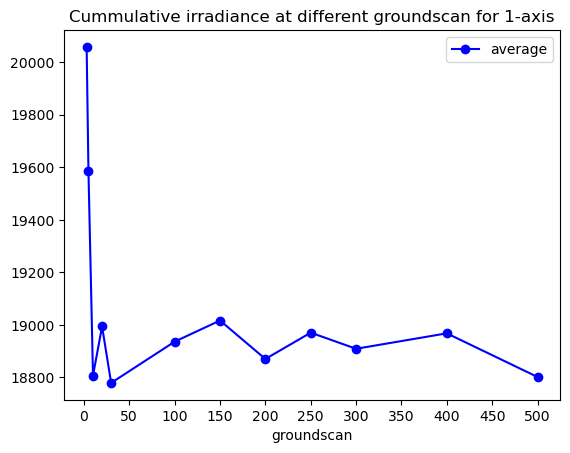

In [70]:
df1 = pd.DataFrame({
    'groundscan': sensorsgroundvalues,
    'average': resultsdict.values()
})

df1.plot(x='groundscan', y='average', marker='o', color='blue')
plt.xticks(np.arange(0, 501, 50))
plt.title('Cummulative irradiance at different groundscan for 1-axis')
plt.show()